In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master

/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master


# Import Packages

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

!pip install googletrans
from googletrans import Translator

import nltk
nltk.download('punkt')

     |████████████████████████████████| 215kB 9.9MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.0MB 13.7MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp37-none-any.whl size=15737 sha256=4e6f4917247ace55239f22b74dbf0be5daf621edc4a899c4b08006d6c80dd99b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
Successfully built googletrans
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import Data

In [ ]:
df = pd.read_csv('data/data_extraction/data_clean.csv')

df

,Unnamed: 0,Unnamed: 0.1,date,user,name,text,retweet,favorite,location,text_clean,text_preprocessed
0,0,0.0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,0.0,0.0,NaN,pasukan lemvar dara babie udah siap blom wkwk...,"['pasu', 'lemvar', 'dara', 'babie', 'udah', 'b..."
1,1,1.0,2021-04-29 5:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,0.0,0.0,Malaysia,hari pertama program vaksin utk warga emas di ...,"['program', 'vaksin', 'utk', 'warga', 'emas', ..."
2,2,2.0,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0.0,0.0,"Sumatera Utara, Indonesia",giat pawas ipda jsiburian beserta piket fungsi...,"['giat', 'pawas', 'ipda', 'jsiburian', 'serta'..."
3,4,4.0,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia,semoga vaksin dalam kenangan,"['moga', 'vaksin', 'kenang']"
4,5,5.0,2021-04-29 5:56:54,mitz_diva,Anastasia Mita,@_teapsy AZ tapi kan isinya virus nonaktif kan...,0.0,0.0,"Here, there, everywhere",teapsy az tapi kan isinya virus nonaktif kan k...,"['teapsy', 'az', 'isi', 'virus', 'nonaktif', '..."
...,...,...,...,...,...,...,...,...,...,...,...
33331,47686,47684.0,Thu May 28 09:42:17 +0000 2020,betilalvinaa,"andrewbudi, e100ss, PemkotMalang, KhofifahIP, ...",coba check point kacuk tidak diperiksa awal psbb,NaN,NaN,Malang,coba check point kacuk tidak diperiksa awal psbb,"['coba', 'check', 'point', 'kacuk', 'periksa',..."
33332,47690,47688.0,Thu May 28 09:42:07 +0000 2020,RadioElshinta,TMCPoldaMetro,giat psbb cek point joglo teguran tertulis pen...,NaN,NaN,"ÜT: -6.187385,106.733011",giat psbb cek point joglo teguran tertulis pen...,"['giat', 'psbb', 'cek', 'point', 'joglo', 'teg..."
33333,47692,47690.0,Thu May 28 09:42:05 +0000 2020,IgnasiusSeno,NaN,divisi kesehatan mengucapkan patuhi psbb korlap,NaN,NaN,NaN,divisi kesehatan mengucapkan patuhi psbb korlap,"['divisi', 'sehat', 'patuh', 'psbb', 'korlap']"
33334,47694,47692.0,Thu May 28 09:42:04 +0000 2020,jodidams,jalastoria,target indonesia mewujudkan kesetaraan gender ...,NaN,NaN,NaN,target indonesia mewujudkan kesetaraan gender ...,"['target', 'indonesia', 'wujud', 'tara', 'gend..."


In [ ]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,date,user,name,text,retweet,favorite,location,text_clean,text_preprocessed
0,0,0.0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,0.0,0.0,NaN,pasukan lemvar dara babie udah siap blom wkwk...,"['pasu', 'lemvar', 'dara', 'babie', 'udah', 'b..."
1,1,1.0,2021-04-29 5:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,0.0,0.0,Malaysia,hari pertama program vaksin utk warga emas di ...,"['program', 'vaksin', 'utk', 'warga', 'emas', ..."
2,2,2.0,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0.0,0.0,"Sumatera Utara, Indonesia",giat pawas ipda jsiburian beserta piket fungsi...,"['giat', 'pawas', 'ipda', 'jsiburian', 'serta'..."
3,4,4.0,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia,semoga vaksin dalam kenangan,"['moga', 'vaksin', 'kenang']"
4,5,5.0,2021-04-29 5:56:54,mitz_diva,Anastasia Mita,@_teapsy AZ tapi kan isinya virus nonaktif kan...,0.0,0.0,"Here, there, everywhere",teapsy az tapi kan isinya virus nonaktif kan k...,"['teapsy', 'az', 'isi', 'virus', 'nonaktif', '..."
5,6,6.0,2021-04-29 5:56:45,sensempoi14,senpai sempoi,@amofficialmy @Sophiealyahya sebenarnya bukan ...,0.0,0.0,Kuala Lumpur Federal Territory,sebenarnya bukan setakat pekerja genting je st...,"['takat', 'kerja', 'genting', 'je', 'staff', '..."
6,7,7.0,2021-04-29 5:56:34,chrisingstar,딸기🍓🎀,"semoga semuanya cepet dapet vaksin, semoga cep...",0.0,0.0,she/her,semoga semuanya cepet dapet vaksin semoga cepe...,"['moga', 'cepet', 'dapet', 'vaksin', 'moga', '..."
7,8,8.0,2021-04-29 5:56:20,adiiwangsa,¢υяνα ησя∂,@Askrlfess Gk btuh vaksin cman btuh kehadiran,0.0,0.0,+62,gk btuh vaksin cman btuh kehadiran,"['gk', 'btuh', 'vaksin', 'cman', 'btuh', 'hadir']"
8,9,9.0,2021-04-29 5:56:00,fareezropi,MFB,@bawangst RM70 juta tapi data dalam website JK...,0.0,0.0,"Kuala Lumpur, Malaysia",rm juta tapi data dalam website jkjav tak sync...,"['rm', 'juta', 'data', 'website', 'jkjav', 'sy..."
9,10,10.0,2021-04-29 5:55:57,kdaybri,diyah ☀️,@kochengfess Yampun nder buruan di obatin ya s...,0.0,0.0,"Bekasi, Jawa Barat",yampun nder buruan di obatin ya sama di bersih...,"['yampun', 'nder', 'buru', 'obatin', 'ya', 'be..."


In [ ]:
len(df)

33336

Removing Duplicate if any

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
len(df)

33336

# Extra Cleaning

In [ ]:
len(df[df['text_preprocessed'].isnull()==True])

0

In [ ]:
pd.set_option('display.max_colwidth', None)
df[df['text_preprocessed'].isnull()==True]['text_preprocessed']

Series([], Name: text_preprocessed, dtype: object)

Removing Observation that the text become empty after cleaning, indicating that the text doesn't have significance sentiment

In [ ]:
df = df.dropna(subset=['text_preprocessed'])
df = df.reset_index(drop=True)

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Unnamed: 0.1             0
date                     0
user                     0
name                  1473
text                     0
retweet               3688
favorite              3688
location             11568
text_clean               0
text_preprocessed        0
clean_text               0
word_length              0
dtype: int64

As there are some word not in Indonesian, possibly indonesian people using other language to tweet, those text will be translated in order to process the text

In [ ]:
clean_text = df['text_preprocessed'].copy()

In [ ]:
pd.set_option('display.max_colwidth', 100)
clean_text.tail(15)

33114    ['syuting', 'minggu', 'wrap', 'atas', 'jam', 'malam', 'deh', 'syuting', 'lagi', 'gila', 'psbb', ...
33115                          ['temanteman', 'dongg', 'psbb', 'jabodetabek', 'bekas', 'bogor', 'ga', 'sih']
33116                                                           ['psbb', 'tumpang', 'belakang', 'gmn', 'mi']
33117    ['coba', 'loh', 'an', 'mal', 'aidin', 'wal', 'faidzin', 'mohon', 'maaf', 'lahir', 'batin', 'psbb...
33118    ['lahir', 'nyata', 'bentuk', 'realitas', 'manusia', 'diksi', 'bahasa', 'realitas', 'paham', 'dik...
33119    ['panjang', 'luas', 'keras', 'psbb', 'gk', 'keras', 'eand', 'medical', 'capacity', 'eand', 'amp'...
33120                                                        ['sby', 'psbb', 'ae', 'mara', 'mudik', 'mudik']
33121                                                                                        ['psbb', 'day']
33122    ['laku', 'usaha', 'apresiasi', 'paket', 'stimulus', 'perintah', 'respons', 'pandemi', 'covid', '...
33123              

In [ ]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_tweets(tweet):
   # nltk.download('stopwords')
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    #tweet = emoji_pattern.sub(r'', tweet)
    
    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

Cleaning text that exaggerate the typing such as 'psbbbbbbbbb' 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
clean_text_exag = clean_text.apply(lambda x: repair_exaggeration(x))

In [ ]:
clean_text_exag.tail(15)

33319    dijawab syuting seminggu wrap diatas jam malam dijawab deh syuting lagii gila kan psbb dan lainl...
33320                                         temanteman dongg kan psbb kan jabodetabek bekasi bogor ga sih 
33321                                                                   psbb penumpangnya dibelakang gmn mi 
33322                        coba loh an minal aidin wal faidzin mohon maaf lahir batin psbb salaman online 
33323    dilahirkan nyata bentuk realitas kemanusiaan diksi digunakan bahasa realitas dipahami bukan diks...
33324    perpanjang perluas keraskan psbb panjang gk keras eand medical capacity eand amp perkuat surveil...
33325                                                                   sby psbb ae marai tidak mudik mudik 
33326                                                                                              psbb day 
33327    pelaku usaha mengapresiasi paket stimulus diberikan pemerintah dalam merespons pandemi covid keb...
33328              

Recleaning after remove exaggeration

In [ ]:
re_clean = clean_text_exag.apply(lambda x: clean_tweets(x))

we use keywords for querying data, now we need to remove them as it will all found in every sentence in this data frame

In [ ]:
keyword = ['vaksin','corona','covid19','covid']
clean_text_extra = re_clean.apply(lambda x: del_word(x,keyword))

In [ ]:
clean_text_extra.tail(15)

33319    dijawab syuting seminggu wrap diatas jam malam dijawab deh syuting lagii gila kan psbb lainlain ...
33320                                         temanteman dongg kan psbb kan jabodetabek bekasi bogor ga sih 
33321                                                                   psbb penumpangnya dibelakang gmn mi 
33322                        coba loh an minal aidin wal faidzin mohon maaf lahir batin psbb salaman online 
33323    dilahirkan nyata bentuk realitas kemanusiaan diksi digunakan bahasa realitas dipahami bukan diks...
33324    perpanjang perluas keraskan psbb panjang gk keras eand medical capacity eand amp perkuat surveil...
33325                                                                   sby psbb ae marai tidak mudik mudik 
33326                                                                                              psbb day 
33327    pelaku usaha mengapresiasi paket stimulus diberikan pemerintah dalam merespons pandemi kebijakan...
33328              

In [ ]:
df['clean_text'] = clean_text_extra

In [ ]:
df['word_length'] = df['clean_text'].apply(lambda x:count_words(x))

In [ ]:
df['word_length'].value_counts().sort_index()

0      205
1      795
2     1621
3     2287
4     2677
5     2961
6     3174
7     3334
8     3306
9     3038
10    2681
11    2138
12    1599
13    1120
14     760
15     459
16     284
17     190
18     117
19     106
20      88
21      64
22      61
23      41
24      40
25      45
26      32
27      19
28      18
29      15
30      13
31       9
32       8
33       3
34       3
35       4
36       5
37       2
38       3
39       3
40       1
41       1
45       1
46       1
47       1
50       1
Name: word_length, dtype: int64

In [ ]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

# Word Processing

## Create word dictionary

In [ ]:
df['text_clean']=df['text_clean'].apply(str)

In [ ]:
word_dict = {}
for i in range(0,len(df['text_clean'])):
    sentence = df['text_clean'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
len(word_dict)

40259

In [ ]:
len({k:v for (k,v) in word_dict.items() if v < 4})

31132

In [ ]:
word_dict

{'pasukan': 17,
 'lemvar': 1,
 'dara': 1,
 'babie': 1,
 'udah': 1571,
 'siap': 280,
 'blom': 63,
 'wkwkwk': 144,
 'yg': 3702,
 'mau': 1232,
 'syahid': 2,
 'lawan': 90,
 'negara': 771,
 'kt': 105,
 'buat': 1074,
 'jadi': 1147,
 'najiiiz': 1,
 '😍😘': 2,
 'hari': 1014,
 'pertama': 670,
 'program': 456,
 'vaksin': 26155,
 'utk': 555,
 'warga': 425,
 'emas': 157,
 'di': 5256,
 'batu': 28,
 'pahat': 1,
 'dalam': 822,
 'khemah': 5,
 'semua': 796,
 'bangsa': 67,
 'cina': 53,
 'je': 492,
 'melayu': 29,
 '😢': 33,
 'giat': 65,
 'pawas': 5,
 'ipda': 7,
 'jsiburian': 1,
 'beserta': 20,
 'piket': 7,
 'fungsi': 52,
 'melaksanakan': 127,
 'patroli': 23,
 'dan': 3012,
 'monitoring': 43,
 'kantor': 183,
 'dpcipk': 1,
 'dpcpp': 1,
 'serta…': 2,
 'semoga': 463,
 'kenangan': 7,
 'teapsy': 2,
 'az': 127,
 'tapi': 1383,
 'kan': 1045,
 'isinya': 34,
 'virus': 593,
 'nonaktif': 2,
 'kalo': 892,
 'kata': 370,
 'org': 401,
 'demam': 141,
 'habis': 531,
 'itu': 1378,
 'artinya': 29,
 'emg': 114,
 'antibodi': 61,
 

## Import Lexicon data

import lexicon, and remove negation words from lexicon, the lexicon is a combination from several sources below, that combined together, and include swear words which has the most negative score

sources : <br>
https://github.com/louisowen6/NLP_bahasa_resources <br>
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt <br>
https://github.com/fajri91/InSet <br>
https://github.com/agusmakmun/SentiStrengthID/blob/master/id_dict/sentimentword.txt 

In [ ]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [ ]:
len(lexicon)

10248

In [ ]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [ ]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [ ]:
len(lexicon_word)

10248

Checking if there is words in dictionary that does not included in the lexicon

In [ ]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

Let's take a look what kind of words they are, lets start with some words that have many occurences as this most likely not  a type case

In [ ]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

1317

In [ ]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

It turns out that the words that is not included in lexicon, are the one that not have signifance sentiment

In [ ]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

tidak 1942
new 1125
mall 861
barang 773
langgar 654
jabar 494
rakyat 474
zona 464
level 443
kota 424
ga 409
berjamur 381
awam 381
jik 380
daerah 363
in 318
kabupaten 296
to 294
s 287
jakarta 272


In [ ]:
word_to_plot = df['clean_text'].copy()

In [ ]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

creating word cloud to see what kind of words that appear often in the tweets related to the pandemic

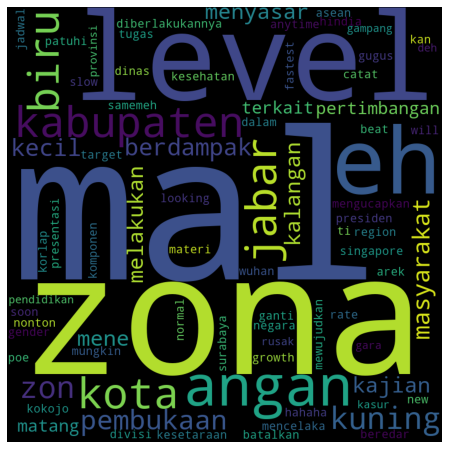

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## sentiment

In [ ]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [ ]:
'pekerti' in word_dict

False

In [ ]:
'budi baik' in lexicon_word

True

In [ ]:
result = df.head(10)

In [ ]:
result

,Unnamed: 0,Unnamed: 0.1,date,user,name,text,retweet,favorite,location,text_clean,text_preprocessed
0,0,0.0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,0.0,0.0,NaN,pasukan lemvar dara babie udah siap blom wkwk...,"['pasu', 'lemvar', 'dara', 'babie', 'udah', 'b..."
1,1,1.0,2021-04-29 5:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,0.0,0.0,Malaysia,hari pertama program vaksin utk warga emas di ...,"['program', 'vaksin', 'utk', 'warga', 'emas', ..."
2,2,2.0,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0.0,0.0,"Sumatera Utara, Indonesia",giat pawas ipda jsiburian beserta piket fungsi...,"['giat', 'pawas', 'ipda', 'jsiburian', 'serta'..."
3,4,4.0,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia,semoga vaksin dalam kenangan,"['moga', 'vaksin', 'kenang']"
4,5,5.0,2021-04-29 5:56:54,mitz_diva,Anastasia Mita,@_teapsy AZ tapi kan isinya virus nonaktif kan...,0.0,0.0,"Here, there, everywhere",teapsy az tapi kan isinya virus nonaktif kan k...,"['teapsy', 'az', 'isi', 'virus', 'nonaktif', '..."
5,6,6.0,2021-04-29 5:56:45,sensempoi14,senpai sempoi,@amofficialmy @Sophiealyahya sebenarnya bukan ...,0.0,0.0,Kuala Lumpur Federal Territory,sebenarnya bukan setakat pekerja genting je st...,"['takat', 'kerja', 'genting', 'je', 'staff', '..."
6,7,7.0,2021-04-29 5:56:34,chrisingstar,딸기🍓🎀,"semoga semuanya cepet dapet vaksin, semoga cep...",0.0,0.0,she/her,semoga semuanya cepet dapet vaksin semoga cepe...,"['moga', 'cepet', 'dapet', 'vaksin', 'moga', '..."
7,8,8.0,2021-04-29 5:56:20,adiiwangsa,¢υяνα ησя∂,@Askrlfess Gk btuh vaksin cman btuh kehadiran,0.0,0.0,+62,gk btuh vaksin cman btuh kehadiran,"['gk', 'btuh', 'vaksin', 'cman', 'btuh', 'hadir']"
8,9,9.0,2021-04-29 5:56:00,fareezropi,MFB,@bawangst RM70 juta tapi data dalam website JK...,0.0,0.0,"Kuala Lumpur, Malaysia",rm juta tapi data dalam website jkjav tak sync...,"['rm', 'juta', 'data', 'website', 'jkjav', 'sy..."
9,10,10.0,2021-04-29 5:55:57,kdaybri,diyah ☀️,@kochengfess Yampun nder buruan di obatin ya s...,0.0,0.0,"Bekasi, Jawa Barat",yampun nder buruan di obatin ya sama di bersih...,"['yampun', 'nder', 'buru', 'obatin', 'ya', 'be..."


calculating the sentiment of words by mathing them to the lexicon while also creating the bag of words matrix

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(result['text_clean'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

KeyError: ignored

In [ ]:
len(sentiment_list)

7822

In [ ]:
print(senrow.shape[0])

10


constructing the data frame that contain bag of words and the sentiments that have been calculated before

In [ ]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [ ]:
df_sen.head(10)

,pasukan,siap,wkwkwk,mau,lawan,buat,jadi,batu,dalam,semua,serta,melaksanakan,patroli,moga,kenangan,isi,kata,habis,itu,arti,emg,lagi,sebenarnya,pekerja,yang,berkaitan,semuanya,cepet,dapet,bebas,main,keluar,kehadiran,juta,data,dah,dapat,dua,yampun,buruan,ya,sama,luka,ikut,biar,aja,sentiment
0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,-1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,1,1,3


lets see if the sentiment is correct by looking at the original text

In [ ]:
cek_df = pd.DataFrame([])
cek_df['text'] = df['text_clean'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [ ]:
cek_df.head(10)

,text,sentiment
0,pasukan lemvar dara babie udah siap blom wkwk...,7.0
1,hari pertama program vaksin utk warga emas di ...,2.0
2,giat pawas ipda jsiburian beserta piket fungsi...,3.0
3,semoga vaksin dalam kenangan,7.0
4,teapsy az tapi kan isinya virus nonaktif kan k...,-1.0
5,sebenarnya bukan setakat pekerja genting je st...,5.0
6,semoga semuanya cepet dapet vaksin semoga cepe...,2.0
7,gk btuh vaksin cman btuh kehadiran,3.0
8,rm juta tapi data dalam website jkjav tak sync...,-1.0
9,yampun nder buruan di obatin ya sama di bersih...,3.0


# EDA

Text(0.5, 0, 'sentiment')

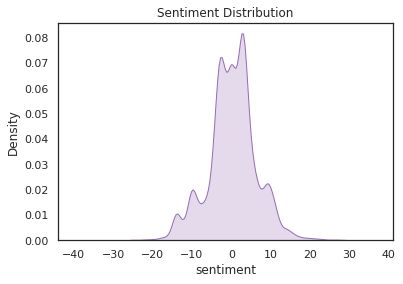

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

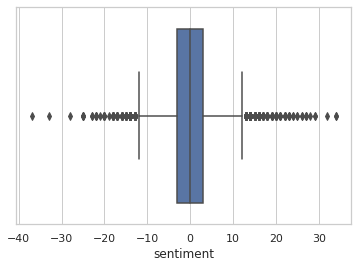

In [ ]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

It look like the sentiments are equally distributed between positive and negative, to be sure, lets take a look at the mean

In [ ]:
df_sen.describe()

,kuning,buka,dampak,kecil,kajian,terkait,normal,celaka,nyinyir,sakit,hati,jadi,politik,slow,down,batal,ganti,lucu,pas,panjang,pikir,mungkin,makhluk,mati,gegara,silahkan,badan,tekanan,usaha,puncak,dana,ujung,suruh,awat,menjelang,keputusan,kamil,beroperasi,bekas,rencana,...,empang,gebang,gambir,sad,seenak,korek,narasi,menakutkan,luck,pamrih,keinget,segenap,dibantu,biarpun,kempes,khianat,taun,mencontoh,berteman,laboratorium,cantik,sambang,kesah,ken,birthday,kado,dibayar,gratis,tumpuan,mulus,mangkel,seni,realitas,menjemukan,respons,kacuk,mengucapkan,mewujudkan,tara,sentiment
count,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.00000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,...,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000,7822.000000
mean,0.029532,0.030043,0.005242,0.002429,0.000128,0.004986,0.130146,0.000128,0.000767,0.001662,0.002685,0.000895,0.002685,0.010611,0.013552,0.002301,0.002685,0.001406,0.009972,0.104449,0.006009,0.006520,0.000384,0.003707,0.001151,0.001534,0.001151,0.000128,0.005369,0.001406,0.000895,0.001918,0.005497,0.001918,0.00946,0.010228,0.006520,0.001534,0.013552,0.003835,...,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000256,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000384,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.183840
std,0.170057,0.197134,0.072214,0.049229,0.011307,0.075689,0.391952,0.011307,0.031973,0.040736,0.056474,0.029904,0.072354,0.102469,0.115627,0.047919,0.051748,0.037477,0.103155,0.330379,0.092361,0.083605,0.019582,0.066794,0.033903,0.039140,0.033903,0.011307,0.078157,0.040746,0.029904,0.046583,0.073945,0.043752,0.09681,0.100619,0.080488,0.042281,0.125184,0.063850,...,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.015989,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,0.033921,0.011307,0.011307,0.011307,0.011307,0.011307,0.011307,6.289297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

it's look like it is almost equally distributed , but the positive have a little bigger occurence here

Now let's take a look at the correlation between words that is included in the sentiment

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(df_sen, 10))
au = get_top_abs_correlations(df_sen, 15)

In [ ]:
print('Perfect Correlation')
au[au==1]

Perfect Correlation


pemberian    menghubungi    1.0
bakti        empang         1.0
ekor         ceroboh        1.0
sambang      kesah          1.0
mengartikan  pantesan       1.0
                           ... 
pengumuman   ketularan      1.0
perut        harus          1.0
berkilah     absurd         1.0
nabi         shalat         1.0
perut        ihh            1.0
Length: 156, dtype: float64

it turns out that there are 156 word that always occur together in every text, although we dont really see how much of the sentences that is included there but the correlation is pretty high

In [ ]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)
            

now let's take a look at other word, that is now always but often come together as the correlation quite high althoughh not equal to 1

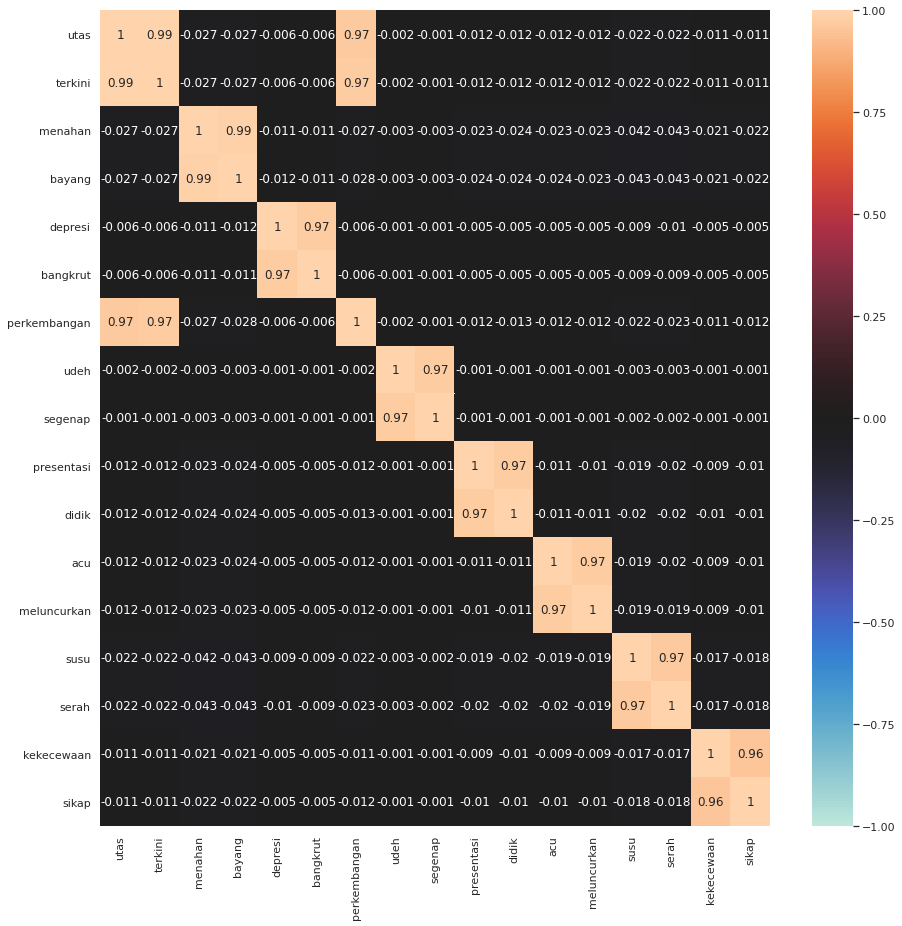

In [ ]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

In [ ]:
top15 = au[au<float(1)][0:15]

In [ ]:
pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
g = sns.barplot(y = top15.index , x = top15,palette=pal)
g.grid=False
plt.xlabel('correlation')
plt.ylabel('pair of words')
plt.title("Top 15 Not-Perfect Correlation",fontweight='bold') 
for i in range(15):
    g.text(top15[i],i+0.22, round(top15[i],3),color='black')
plt.show()

NotImplementedError: ignored

It looks like most of them is naturally come together but there are some that not really immeadiately come to mind

now lets take a look at the most occured words among the set of words that is included in lexicon

In [ ]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

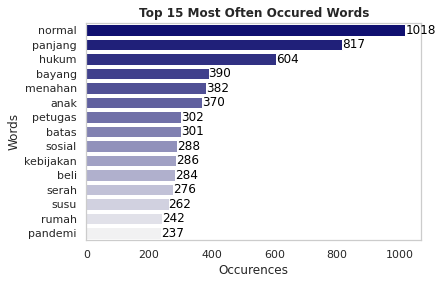

In [ ]:
#pal =sns.dark_palette("purple", input="xkcd",n_colors=15)
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

## Beyond Words

now we want to explore more than the word it self, hence we pass the sentiment into the original dataset and then explore some data there 

In [ ]:
df['sentiment'] = df_sen['sentiment']

In [ ]:
df.head(5)

,id,created_at,source,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,date_created,time_created,word_length,sentiment
0,1266039172315230209,Thu May 28 16:10:35 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @ridwankamil: Minggu ini 60% Kota/Kab Jabar sudah di zona Biru (level 2) dan 40 % di zona kun...,kota kabupaten jabar zona biru level zona kuning level tidak zon,in,0,342,cmdblck,NaN,NaN,ridwankamil,NaN,NaN,2020-05-28,23:10:35,11,-4
1,1266039166350983169,Thu May 28 16:10:33 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @kompascom: Pembukaan mal tidak berarti akan berdampak pada masyarakat kecil. Hal itu karena ...,pembukaan mal tidak berdampak masyarakat kecil mal mal menyasar kalangan mene,in,0,12,Gulagulalibosku,NaN,NaN,kompascom,"Bandung, Jawa Barat",NaN,2020-05-28,23:10:33,11,3
2,1266039153487044608,Thu May 28 16:10:30 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Pemerintah tentunya sudah melakukan kajian/pertimbangan2 yg matang terkait diberlakukannya New N...,melakukan kajian pertimbangan matang terkait diberlakukannya new normal catat presiden tidak men...,in,0,0,HmfaqihA,NaN,NaN,NaN,NaN,NaN,2020-05-28,23:10:30,23,1
3,1266039147149422592,Thu May 28 16:10:29 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","RT @Covid19Update24: Indonesia #COVID19 growth rate is fastest in Asean Region, not looking to s...",growth rate is fastest in asean region not looking to slow down anytime soon will beat singapore,en,0,111,Summa_CL,NaN,COVID19,Covid19Update24,Road to Success🌟,NaN,2020-05-28,23:10:29,17,-2
4,1266039127834636291,Thu May 28 16:10:24 +0000 2020,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",@iksansaptari Hahaha\r\nKokojo\r\nAing arek nonton pisan hindia 2 poe samemeh PSBB di tetap kan ...,hahaha kokojo arek nonton hindia poe samemeh kan eh batalkan eh ganti jadwal,in,0,0,Prayogaaaaaaa,NaN,NaN,iksansaptari,"Ciamis, Indonesia","[[108.391549, -7.363503], [108.494179, -7.363503], [108.494179, -7.293356], [108.391549, -7.2933...",2020-05-28,23:10:24,13,-2


In [ ]:
df.isnull().sum()

id                           0
created_at                   0
source                       0
original_text                0
clean_text                   0
lang                         0
favorite_count               0
retweet_count                0
original_author              0
possibly_sensitive        5490
hashtags                  6623
user_mentions             1794
place                     2600
place_coord_boundaries    7703
date_created                 0
time_created                 0
word_length                  0
sentiment                    0
dtype: int64

lets take a look at the other factor that is correlated to the sentiment itself

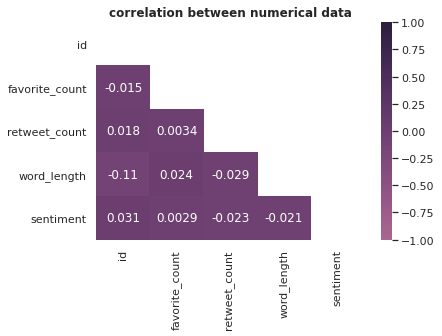

In [ ]:
plt.figure()
plt.title('correlation between numerical data',fontweight='bold')
df_corr = df.corr()
matrix = np.triu(df.corr())
cmap =  sns.cubehelix_palette(light=0.5, as_cmap=True)
h = sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1, center= 0,mask=matrix,cmap = cmap)

plt.show()

from the numerical feature, it seems the correlation is very low, now lets take a look at the others

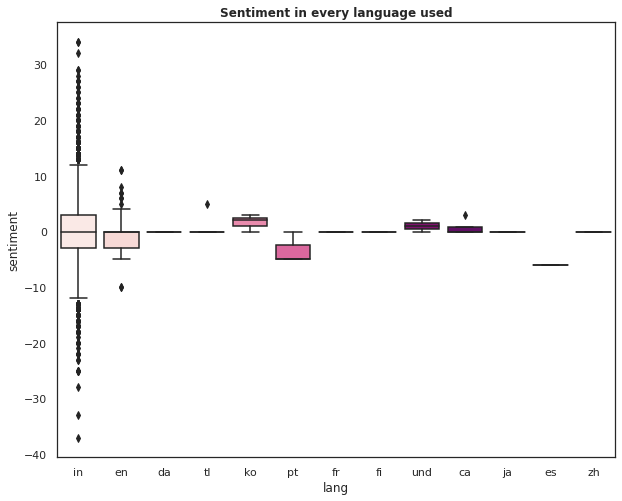

In [ ]:
sns.set(style="white", color_codes=True)
plt.figure(figsize=(10,8))
plt.title('Sentiment in every language used',fontweight='bold')
l = sns.boxplot(x='lang',y='sentiment',data=df,palette= sns.color_palette("RdPu", 10))

it looks like people from this time frame that  language 'ko' and 'und' always used to give positive sentiment while it is the opposite for 'pt' and 'es'

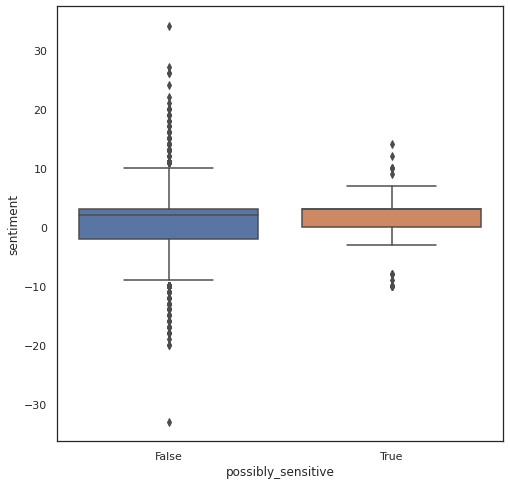

In [ ]:
cek_df = df.dropna(subset=['possibly_sensitive'])
cek_df = cek_df.reset_index(drop=True)
plt.figure(figsize=(8,8))
g = sns.boxplot(x='possibly_sensitive',y='sentiment',data=cek_df)
plt.show()

the sensitive content does not indicating the statement as they are almost equally distributed among them

In [ ]:
df_place = df.groupby(['place']).mean().sort_values(by='sentiment',ascending=False)
df_place = df_place.reset_index()

In [ ]:
df_place_dict = df.groupby(['place']).count().sort_values(by='id',ascending=False)['id'].to_dict()

In [ ]:
df_place['number_of_tweets'] =  df_place.apply(lambda x:df_place_dict[x['place']],axis=1)

In [ ]:
top10_place_pos = df_place.sort_values(by='sentiment',ascending=False)[0:10].reset_index(drop=True)
top10_place_neg = df_place.sort_values(by='sentiment',ascending=True)[0:10].reset_index(drop=True)
top10_place     = df_place.sort_values(by='number_of_tweets',ascending=False)[0:10].reset_index(drop=True)

now let's take a look at some places where the sentiment that is made from them is tend to be sensitive and also for places that made otherwise

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127470 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127465 missing from current font.
  font.set_text(s, 0, flags=flags)


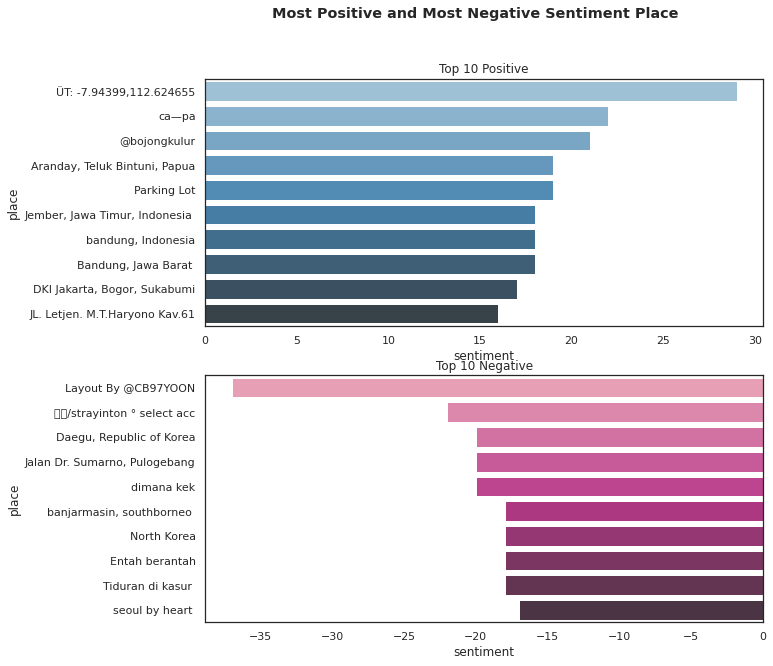

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
fig.suptitle('Most Positive and Most Negative Sentiment Place',fontweight='bold')
h = sns.barplot(y='place',x='sentiment',data=top10_place_pos,ax=ax1,palette=sns.color_palette("Blues_d",n_colors=10))
n = sns.barplot(y='place',x='sentiment',data=top10_place_neg,ax=ax2,palette=sns.color_palette('RdPu_d',n_colors=10))
ax1.set_title('Top 10 Positive')
ax2.set_title('Top 10 Negative')
plt.show()

last but not least, let's take a look at some places where tweets is most often come from

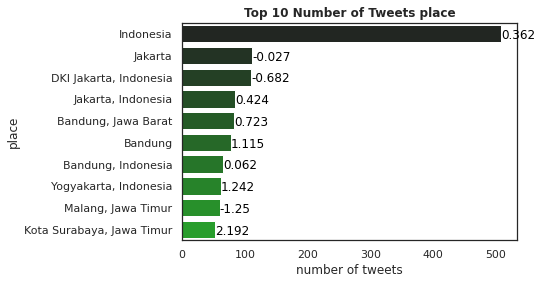

In [ ]:
pal =sns.dark_palette("green", input="xkcd",n_colors=10)
g = sns.barplot(y = top10_place['place'] , x = top10_place['number_of_tweets'],palette=pal)
g.grid=False
plt.xlabel('number of tweets')
plt.ylabel('place')
plt.title("Top 10 Number of Tweets place",fontweight='bold') 

for i in range(10):
    g.text(top10_place['number_of_tweets'][i], i+0.22 ,round(top10_place['sentiment'][i],3),color='black')
    
plt.show()

# VADER, ENTROPY, INFORMATION GAIN

In [ ]:
#label with vader

In [ ]:
! pip install VaderSentiment

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/dataset_new.csv')

In [ ]:
df

,Unnamed: 0,date,user,name,text,retweet,favorite,location
0,0,2021-04-29 05:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,0.0,0.0,NaN
1,1,2021-04-29 05:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,0.0,0.0,Malaysia
2,2,2021-04-29 05:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0.0,0.0,"Sumatera Utara, Indonesia"
3,3,2021-04-29 05:57:22,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0.0,0.0,"Sumatera Utara, Indonesia"
4,4,2021-04-29 05:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia
...,...,...,...,...,...,...,...,...
31764,31763,2021-04-21 03:26:24,_ahmadboii,Metaboiilism,Mak dengan tok aku dah selamat vaksin dah. Tap...,0.0,1.0,05400 ↔️ 40300
31765,31764,2021-04-21 03:25:53,_anoviandi,Noffee,Kapuspen: Vaksin Nusantara Bukan Program TNI\n...,0.0,0.0,NaN
31766,31765,2021-04-21 03:25:43,harta_juni,Juny Harta,Antri Vaksin kedua https://t.co/c3tke7hMRa,0.0,0.0,"Meneng di Bali, Indonesia"
31767,31766,2021-04-21 03:24:46,smkar,Emka AP,@CNNIndonesia Kira² Mak Erot apakah juga diiji...,0.0,0.0,NaN


In [ ]:
df.drop(columns=['Unnamed: 0', 'date', 'user', 'name', 'retweet',	'favorite',	'location'])

,text
0,@kopinagih Pasukan lemvar dara babie udah siap...
1,hari pertama program vaksin utk warga emas di ...
2,Giat Pawas Ipda J.Siburian beserta piket fungs...
3,Giat Pawas Ipda J.Siburian beserta piket fungs...
4,@Khairykj Semoga vaksin dalam kenangan
...,...
31764,Mak dengan tok aku dah selamat vaksin dah. Tap...
31765,Kapuspen: Vaksin Nusantara Bukan Program TNI\n...
31766,Antri Vaksin kedua https://t.co/c3tke7hMRa
31767,@CNNIndonesia Kira² Mak Erot apakah juga diiji...


In [ ]:
df.text=df.text.astype(str)

In [ ]:
#  Cleaning text
import re
import string

def clean_text(tweet):
    tweet = tweet.lower() # text lowercase
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    tweet = re.sub('\[.*?\]', '', tweet) # remove square brackets
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # remove punctuation
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet)
    tweet = re.sub('\n', '', tweet)
    return tweet

    
tweet = lambda x: clean_text(x)

In [ ]:
data_clean = pd.DataFrame(df.text.apply(tweet))
data_clean

,text
0,pasukan lemvar dara babie udah siap blom wkw...
1,hari pertama program vaksin utk warga emas di ...
2,giat pawas ipda jsiburian beserta piket fungsi...
3,giat pawas ipda jsiburian beserta piket fungsi...
4,semoga vaksin dalam kenangan
...,...
31764,mak dengan tok aku dah selamat vaksin dah tapi...
31765,kapuspen vaksin nusantara bukan program tniduk...
31766,antri vaksin kedua
31767,kira² mak erot apakah juga diijinkan utk buat...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'), additional)

data_clean1 = pd.DataFrame(data_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)])))
data_clean1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text
0,pasukan lemvar dara babie udah siap blom wkwkw...
1,hari pertama program vaksin utk warga emas di ...
2,giat pawas ipda jsiburian beserta piket fungsi...
3,giat pawas ipda jsiburian beserta piket fungsi...
4,semoga vaksin dalam kenangan
...,...
31764,mak dengan tok aku dah selamat vaksin dah tapi...
31765,kapuspen vaksin nusantara bukan program tniduk...
31766,antri vaksin kedua
31767,kira² mak erot apakah juga diijinkan utk buat ...


In [ ]:
tokens = pd.DataFrame(data_clean1['text'].apply(nltk.word_tokenize))
tokens.head()

,text
0,"[pasukan, lemvar, dara, babie, udah, siap, blo..."
1,"[hari, pertama, program, vaksin, utk, warga, e..."
2,"[giat, pawas, ipda, jsiburian, beserta, piket,..."
3,"[giat, pawas, ipda, jsiburian, beserta, piket,..."
4,"[semoga, vaksin, dalam, kenangan]"


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

wnl = WordNetLemmatizer()
def lemmatize(s):
  s = [wnl.lemmatize(word) for word in s]
  return s
tokens= tokens.assign(lemmatize = tokens.text.apply(lambda x: lemmatize(x)))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
tokens.head()

,text,lemmatize
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo..."
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e..."
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,..."
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,..."
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]"


In [ ]:

from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer() 
tokens['stemmer'] = tokens['lemmatize'].apply(lambda x: [stemmer.stem(i) for i in x])
tokens.head()

,text,lemmatize,stemmer
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babi, udah, siap, blom..."
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e..."
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawa, ipda, jsiburian, beserta, piket, ..."
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawa, ipda, jsiburian, beserta, piket, ..."
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]"


In [ ]:
tokens['stemmer'] = tokens['stemmer'].apply(lambda x: ' '.join([w for w in x]))
tokens.head()

,text,lemmatize,stemmer
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo...",pasukan lemvar dara babi udah siap blom wkwkwk...
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e...",hari pertama program vaksin utk warga ema di b...
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]",semoga vaksin dalam kenangan


## SENTIMENT ANALYSIS NLTK VADER

In [ ]:

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Analiza sentimenata NLTK Vader

def sentiment_analyze(stemmer):
  score = SentimentIntensityAnalyzer().polarity_scores(stemmer)
  neg = score['neg'] 
  pos = score['pos']
  neu = score['neu']

  return SentimentIntensityAnalyzer().polarity_scores(stemmer)

In [ ]:
tokens['polarity']= tokens['stemmer'].apply(sentiment_analyze)

In [ ]:
tokens['compound'] = tokens['polarity'].apply(lambda d:d['compound'])

In [ ]:
tokens.head()

,text,lemmatize,stemmer,polarity,compound
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo...",pasukan lemvar dara babi udah siap blom wkwkwk...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7003
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e...",hari pertama program vaksin utk warga ema di b...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]",semoga vaksin dalam kenangan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
tokens['sentiment'] = tokens['compound'].apply(lambda score: 'positive' if score>=0.05 else 'negative' if score<=-0.05 else 'neutral')

In [ ]:

tokens.head()

,text,lemmatize,stemmer,polarity,compound,sentiment
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo...",pasukan lemvar dara babi udah siap blom wkwkwk...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7003,positive
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e...",hari pertama program vaksin utk warga ema di b...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767,negative
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]",semoga vaksin dalam kenangan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
tokens.to_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/data_clean_new.csv')

NameError: ignored

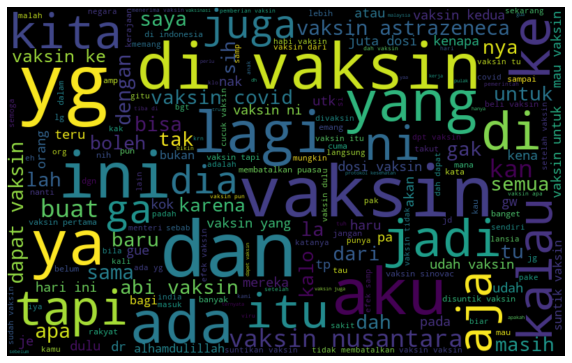

In [ ]:

# Word cloud
all_words = ' '.join([text for text in tokens['stemmer']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
LabelEncoder = preprocessing.LabelEncoder

for column in tokens.columns:
    if tokens['sentiment'].dtype == type(object):
        le = LabelEncoder()
        tokens['sentiment'] = le.fit_transform(tokens['sentiment'])

tokens.head(10)

,text,lemmatize,stemmer,polarity,compound,sentiment
0,"[pasukan, lemvar, dara, babie, udah, siap, blo...","[pasukan, lemvar, dara, babie, udah, siap, blo...",pasukan lemvar dara babi udah siap blom wkwkwk...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7003,2
1,"[hari, pertama, program, vaksin, utk, warga, e...","[hari, pertama, program, vaksin, utk, warga, e...",hari pertama program vaksin utk warga ema di b...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767,0
2,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
3,"[giat, pawas, ipda, jsiburian, beserta, piket,...","[giat, pawas, ipda, jsiburian, beserta, piket,...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,"[semoga, vaksin, dalam, kenangan]","[semoga, vaksin, dalam, kenangan]",semoga vaksin dalam kenangan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
5,"[az, tapi, kan, isinya, virus, nonaktif, kan, ...","[az, tapi, kan, isinya, virus, nonaktif, kan, ...",az tapi kan isinya viru nonaktif kan kalo kata...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
6,"[sebenarnya, bukan, setakat, pekerja, genting,...","[sebenarnya, bukan, setakat, pekerja, genting,...",sebenarnya bukan setakat pekerja gent je staff...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
7,"[semoga, semuanya, cepet, dapet, vaksin, semog...","[semoga, semuanya, cepet, dapet, vaksin, semog...",semoga semuanya cepet dapet vaksin semoga cepe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
8,"[gk, btuh, vaksin, cman, btuh, kehadiran]","[gk, btuh, vaksin, cman, btuh, kehadiran]",gk btuh vaksin cman btuh kehadiran,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
9,"[juta, tapi, data, dalam, website, jkjav, tak,...","[juta, tapi, data, dalam, website, jkjav, tak,...",juta tapi data dalam websit jkjav tak sync dgn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


## entropy

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/data_clean_new.csv')

In [ ]:
df

,Unnamed: 0,text,lemmatize,stemmer,polarity,compound,sentiment
0,0,"['pasukan', 'lemvar', 'dara', 'babie', 'udah',...","['pasukan', 'lemvar', 'dara', 'babie', 'udah',...",pasukan lemvar dara babi udah siap blom wkwkwk...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7003,positive
1,1,"['hari', 'pertama', 'program', 'vaksin', 'utk'...","['hari', 'pertama', 'program', 'vaksin', 'utk'...",hari pertama program vaksin utk warga ema di b...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767,negative
2,2,"['giat', 'pawas', 'ipda', 'jsiburian', 'besert...","['giat', 'pawas', 'ipda', 'jsiburian', 'besert...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,3,"['giat', 'pawas', 'ipda', 'jsiburian', 'besert...","['giat', 'pawas', 'ipda', 'jsiburian', 'besert...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,4,"['semoga', 'vaksin', 'dalam', 'kenangan']","['semoga', 'vaksin', 'dalam', 'kenangan']",semoga vaksin dalam kenangan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
...,...,...,...,...,...,...,...
31764,31764,"['mak', 'dengan', 'tok', 'aku', 'dah', 'selama...","['mak', 'dengan', 'tok', 'aku', 'dah', 'selama...",mak dengan tok aku dah selamat vaksin dah tapi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
31765,31765,"['kapuspen', 'vaksin', 'nusantara', 'bukan', '...","['kapuspen', 'vaksin', 'nusantara', 'bukan', '...",kapuspen vaksin nusantara bukan program tniduk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
31766,31766,"['antri', 'vaksin', 'kedua']","['antri', 'vaksin', 'kedua']",antri vaksin kedua,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
31767,31767,"['kira²', 'mak', 'erot', 'apakah', 'juga', 'di...","['kira²', 'mak', 'erot', 'apakah', 'juga', 'di...",kira² mak erot apakah juga diijinkan utk buat ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [ ]:
df['example'] = 'positive'

In [ ]:
df

,Unnamed: 0,text,lemmatize,stemmer,polarity,compound,sentiment,example
0,0,"['pasukan', 'lemvar', 'dara', 'babie', 'udah',...","['pasukan', 'lemvar', 'dara', 'babie', 'udah',...",pasukan lemvar dara babi udah siap blom wkwkwk...,"{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'comp...",0.7003,positive,positive
1,1,"['hari', 'pertama', 'program', 'vaksin', 'utk'...","['hari', 'pertama', 'program', 'vaksin', 'utk'...",hari pertama program vaksin utk warga ema di b...,"{'neg': 0.147, 'neu': 0.853, 'pos': 0.0, 'comp...",-0.4767,negative,positive
2,2,"['giat', 'pawas', 'ipda', 'jsiburian', 'besert...","['giat', 'pawas', 'ipda', 'jsiburian', 'besert...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
3,3,"['giat', 'pawas', 'ipda', 'jsiburian', 'besert...","['giat', 'pawas', 'ipda', 'jsiburian', 'besert...",giat pawa ipda jsiburian beserta piket fungsi ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
4,4,"['semoga', 'vaksin', 'dalam', 'kenangan']","['semoga', 'vaksin', 'dalam', 'kenangan']",semoga vaksin dalam kenangan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
...,...,...,...,...,...,...,...,...
31764,31764,"['mak', 'dengan', 'tok', 'aku', 'dah', 'selama...","['mak', 'dengan', 'tok', 'aku', 'dah', 'selama...",mak dengan tok aku dah selamat vaksin dah tapi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
31765,31765,"['kapuspen', 'vaksin', 'nusantara', 'bukan', '...","['kapuspen', 'vaksin', 'nusantara', 'bukan', '...",kapuspen vaksin nusantara bukan program tniduk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
31766,31766,"['antri', 'vaksin', 'kedua']","['antri', 'vaksin', 'kedua']",antri vaksin kedua,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive
31767,31767,"['kira²', 'mak', 'erot', 'apakah', 'juga', 'di...","['kira²', 'mak', 'erot', 'apakah', 'juga', 'di...",kira² mak erot apakah juga diijinkan utk buat ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,positive


In [ ]:
data1 = df['sentiment']
data2 = df['example']

entropy(data1) 

0.768429885660489

In [ ]:
entropy(data2)

-1.4426951595367387e-09

In [ ]:
def entropy(y):

  if isinstance(y, pd.Series):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

  else:
    raise('Error')

print('Entropy :')


Entropy :


-1.4426951595367387e-09

In [ ]:
def variance(y):
  '''
  Function to help calculate the variance avoiding nan.
  y: variable to calculate variance to. It should be a Pandas Series.
  '''
  if(len(y) == 1):
    return 0
  else:
    return y.var()

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  
  a = sum(mask)
  b = mask.shape[0] - a
  
  if(a == 0 or b ==0): 
    ig = 0
  
  else:
    if y.dtypes != 'O':
      ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
    else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
  return ig

print('Information Gain :')
information_gain(df['sentiment'], df['sentiment'] == 'neutral')

Information Gain :


0.6244265260223761

# Scraping Twitter

In [ ]:
%cd /content/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based

/content/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based


## test 1

In [ ]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob

!pip install preprocessor
!pip install tweet-preprocessor
import preprocessor as p
from preprocessor.api import clean, tokenize, parse

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast

#the code here is based on the reference below, after some modification and combine improvement from various other sources
#references : https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
#used after some modification 

#Twitter credentials for the app
consumer_key = '0rKsgEyTeAnXSnzVIQ6uFyo87'
consumer_secret = 'mFUKg2W5WkSx9LhhCGxo5GzcxvMDZvRSou2fBoUiT87aVMJjro'
access_key= '204288410-24feOnEqz4IRx4Wsx09b9zMlPyhh04RtTMfH0WPZ'
access_secret = 'cotZKFwGgHisw27ccwujNSugzJRsVyYqi48ZA7sNAVCqJ'

#pass twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

#file location changed to "data/telemedicine_data_extraction/" for clearer path
if not os.path.exists('data'):
    os.mkdir('data')
if not os.path.exists('data/data_extraction'):
    os.mkdir('data/data_extraction')

covid19_indonesia = "data/data_extraction/covid19_indonesia.csv"

#columns of the csv file
COLS = ['id', 'created_at', 'source', 'original_text','clean_text',  'lang',
        'favorite_count', 'retweet_count', 'original_author', 'possibly_sensitive', 'hashtags',
        'user_mentions', 'place', 'place_coord_boundaries']

#set two date variables for date range
start_date = '2021-01-01'
end_date = '2021-02-01'

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)


#mrhod clean_tweets()
def clean_tweets(tweet):
    #use slang words and stopwords to clean the data
    # the stop words and slang words that is used, comes from https://github.com/louisowen6/NLP_bahasa_resources
    # after some modification

    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    content = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    tweet = tweet.lower()
    #after tweepy preprocessing the colon left remain after removing mentions
    #or RT sign in the beginning of the tweet
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)

    #remove punctuation manually
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #remove tags
    tweet=re.sub("&lt;/?.*?&gt;","&lt;&gt;",tweet)
    
    #remove digits and special chars
    tweet=re.sub("(\\d|\\W)+"," ",tweet)

    #remove other symbol from tweet
    tweet = re.sub(r'â', '', tweet)
    tweet = re.sub(r'€', '', tweet)
    tweet = re.sub(r'¦', '', tweet)

    #modify the slang words into a more proper one
    word_tokens = word_tokenize(tweet)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]

    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)

#method write_tweets()
def write_tweets(keyword, file):
    # If the file exists, then read the existing data from the CSV file.
    if os.path.exists(file):
        df = pd.read_csv(file, header=0)
    else:
        df = pd.DataFrame(columns=COLS)
    #page attribute in tweepy.cursor and iteration
    for page in tweepy.Cursor(api.search, q=keyword,
                              count=200, include_rts=False, since=start_date, tweet_mode="extended").pages(100):
        for status in page:
            new_entry = []
            status = status._json

            #when run the code, below code replaces the retweet amount and
            #no of favorires that are changed since last download.
            if status['created_at'] in df['created_at'].values:
                i = df.loc[df['created_at'] == status['created_at']].index[0]
                if status['favorite_count'] != df.at[i, 'favorite_count'] or \
                   status['retweet_count'] != df.at[i, 'retweet_count']:
                    df.at[i, 'favorite_count'] = status['favorite_count']
                    df.at[i, 'retweet_count'] = status['retweet_count']
                continue

           #tweepy preprocessing called for basic preprocessing
            clean_text = clean(status['full_text'])

            #call clean_tweet method for extra preprocessing
                
            filtered_tweet=clean_tweets(clean_text)
           
            #new entry append
            new_entry += [status['id'], status['created_at'],
                          status['source'], status['full_text'],filtered_tweet,  status['lang'],
                          status['favorite_count'], status['retweet_count']]

            #to append original author of the tweet
            new_entry.append(status['user']['screen_name'])

            try:
                is_sensitive = status['possibly_sensitive']
            except KeyError:
                is_sensitive = None
            new_entry.append(is_sensitive)

            # hashtagas and mentiones are saved using comma separted
            hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
            new_entry.append(hashtags)
            mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
            new_entry.append(mentions)

            #get location of the tweet if possible
            try:
                location = status['user']['location']
            except TypeError:
                location = ''
            new_entry.append(location)

            try:
                coordinates = [coord for loc in status['place']['bounding_box']['coordinates'] for coord in loc]
            except TypeError:
                coordinates = None
            new_entry.append(coordinates)

            single_tweet_df = pd.DataFrame([new_entry], columns=COLS)
            df = df.append(single_tweet_df, ignore_index=True)
            csvFile = open(file, 'a' ,encoding='utf-8')
    df.to_csv(csvFile, mode='a', columns=COLS, index=False, encoding="utf-8")

#declare keywords as a query for three categories
covid19_indonesia_keywords = '#vaksin OR ((#covid19 OR covid19) AND (indonesia OR pemerintah)) OR ((#vaksincovid19 OR vaksincovid19) AND (indonesia OR pemerintah)) OR vaksincorona '

#call main method passing keywords and file path

write_tweets(covid19_indonesia_keywords,covid19_indonesia)

## test 2

In [ ]:
%cd /content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master

/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master


In [ ]:
import os
import tweepy as tw
import pandas as pd

consumer_key = '0rKsgEyTeAnXSnzVIQ6uFyo87'
consumer_secret = 'mFUKg2W5WkSx9LhhCGxo5GzcxvMDZvRSou2fBoUiT87aVMJjro'
access_key= '204288410-24feOnEqz4IRx4Wsx09b9zMlPyhh04RtTMfH0WPZ'
access_secret = 'cotZKFwGgHisw27ccwujNSugzJRsVyYqi48ZA7sNAVCqJ'

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth,wait_on_rate_limit = True)

search_words = "vaksin"
new_search   = search_words + " -filter:retweets"

In [ ]:
tweets = tw.Cursor(api.search, 
                   q                = new_search,
                   result_type      = "mixed",
                   lang             = "id",
                   count            = 100,
                   include_entities = True,
                   since_id         = "2021-01-01").items(100000)

users_locs = [[tweet.created_at,
               tweet.author.screen_name,
               tweet.author.name,
               tweet.text,
               tweet.retweet_count,
               tweet.favorite_count,
               tweet.user.location] for tweet in tweets]

tweet_text = pd.DataFrame(data = users_locs, 
                          columns = ["date",
                                     "user",
                                     "name",
                                     "text",
                                     "retweet",
                                     "favorite",
                                     "location"])

In [ ]:
tweet_text

,date,user,name,text,retweet,favorite,location
0,2021-04-29 05:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,0,0,
1,2021-04-29 05:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,0,0,Malaysia
2,2021-04-29 05:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0,0,"Sumatera Utara, Indonesia"
3,2021-04-29 05:57:22,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,0,0,"Sumatera Utara, Indonesia"
4,2021-04-29 05:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0,0,Malaysia
...,...,...,...,...,...,...,...
31763,2021-04-21 03:26:24,_ahmadboii,Metaboiilism,Mak dengan tok aku dah selamat vaksin dah. Tap...,0,1,05400 ↔️ 40300
31764,2021-04-21 03:25:53,_anoviandi,Noffee,Kapuspen: Vaksin Nusantara Bukan Program TNI\n...,0,0,
31765,2021-04-21 03:25:43,harta_juni,Juny Harta,Antri Vaksin kedua https://t.co/c3tke7hMRa,0,0,"Meneng di Bali, Indonesia"
31766,2021-04-21 03:24:46,smkar,Emka AP,@CNNIndonesia Kira² Mak Erot apakah juga diiji...,0,0,


In [ ]:
%cd /content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master

/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master


In [ ]:
tweet_text.to_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/dataset_new.csv')

# Data undestanding using pandas


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/dataset_new_fix.csv")
type(df)

pandas.core.frame.DataFrame

In [ ]:
len(df)


47703

In [ ]:
df.shape

(47703, 5)

In [ ]:
df.head()

,date,user,name,text,location
0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,NaN
1,2021-04-29 5:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,Malaysia
2,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,"Sumatera Utara, Indonesia"
3,2021-04-29 5:57:22,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,"Sumatera Utara, Indonesia"
4,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,Malaysia


In [ ]:
df.tail()

,date,user,name,text,location
47698,Thu May 28 09:42:00 +0000 2020,anndaryyyyy,berlianidris,gugus tugas surabaya wuhan beredar materi pres...,NaN
47699,NaN,NaN,NaN,NaN,NaN
47700,Thu May 28 09:41:59 +0000 2020,billyriawan,Nadine_Oliv,gara psbb kasur gampang rusak deh,Bali-Dps
47701,NaN,NaN,NaN,NaN,NaN
47702,Thu May 28 09:41:53 +0000 2020,nizamronny,"cvltftw, adesulistioo",psbb perwedangan sekala besaran,YOGYAKARTA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47703 entries, 0 to 47702
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      39736 non-null  object
 1   user      39736 non-null  object
 2   name      37870 non-null  object
 3   text      39670 non-null  object
 4   location  25674 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


In [ ]:
df = df.drop(columns=['favorite', 'retweet', 'Unnamed: 0'])

In [ ]:
df

,date,user,name,text,location
0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap...,NaN
1,2021-04-29 5:58:02,daughterette,ojou,hari pertama program vaksin utk warga emas di ...,Malaysia
2,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,"Sumatera Utara, Indonesia"
3,2021-04-29 5:57:22,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungs...,"Sumatera Utara, Indonesia"
4,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,Malaysia
...,...,...,...,...,...
47698,Thu May 28 09:42:00 +0000 2020,anndaryyyyy,berlianidris,gugus tugas surabaya wuhan beredar materi pres...,NaN
47699,NaN,NaN,NaN,NaN,NaN
47700,Thu May 28 09:41:59 +0000 2020,billyriawan,Nadine_Oliv,gara psbb kasur gampang rusak deh,Bali-Dps
47701,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,date,user,name,text,location
count,39736,39736,37870,39670,25674
unique,38499,25402,19964,35412,7699
top,2021-04-29 1:00:00,Vaksin_Vuritust,Praz_Teguh,hukuman langgar psbb,Indonesia
freq,12,411,573,574,2401


In [ ]:
data

[1]

In [ ]:
def entropy(y):

  if isinstance(y, pd.Series):
    a = y.value_counts()/y.shape[0]
    entropy = np.sum(-a*np.log2(a+1e-9))
    return(entropy)

  else:
    raise('Error')

print('Entropy :')
entropy(data) 

# Cleaning text

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

     |████████████████████████████████| 215kB 6.9MB/s 


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/dataset_new_fix.csv")
df

,Unnamed: 0,date,user,name,text,retweet,favorite,location
0,0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap blom ? Wkwkwk yg mau syahid lawan negara kt buat jadi Najiiiz 😍😘,0.0,0.0,NaN
1,1,2021-04-29 5:58:02,daughterette,ojou,"hari pertama program vaksin utk warga emas di batu pahat. dalam 3 khemah, semua bangsa cina. 2 je melayu 😢",0.0,0.0,Malaysia
2,2,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungsi melaksanakan Patroli dan monitoring kantor DPC.IPK dan DPC.PP serta… https://t.co/MV7G4UKfnt,0.0,0.0,"Sumatera Utara, Indonesia"
3,3,2021-04-29 5:57:22,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungsi melaksanakan Patroli dan monitoring kantor DPC.IPK dan DPC.PP serta… https://t.co/JZbI8JtlqA,0.0,0.0,"Sumatera Utara, Indonesia"
4,4,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia
...,...,...,...,...,...,...,...,...
47698,47696,Thu May 28 09:42:00 +0000 2020,anndaryyyyy,berlianidris,gugus tugas surabaya wuhan beredar materi presentasi dinas pendidikan provinsi j,NaN,NaN,NaN
47699,47697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47700,47698,Thu May 28 09:41:59 +0000 2020,billyriawan,Nadine_Oliv,gara psbb kasur gampang rusak deh,NaN,NaN,Bali-Dps
47701,47699,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
df['text_2']=df['text'].apply(str)

In [ ]:
df

In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocessing tweets data

df['text_clean'] = df['text_2'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.drop(['text_2'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
df.drop_duplicates(subset = 'text_clean', inplace = True)

In [ ]:
df

,Unnamed: 0,date,user,name,text,retweet,favorite,location,text_clean,text_preprocessed
0,0,2021-04-29 5:58:30,Vaksin_Vuritust,Vantek_Qodrun,@kopinagih Pasukan lemvar dara babie udah siap blom ? Wkwkwk yg mau syahid lawan negara kt buat jadi Najiiiz 😍😘,0.0,0.0,NaN,pasukan lemvar dara babie udah siap blom wkwkwk yg mau syahid lawan negara kt buat jadi najiiiz 😍😘,"[pasu, lemvar, dara, babie, udah, blom, wkwkwk, yg, syahid, lawan, negara, kt, najiiiz, ]"
1,1,2021-04-29 5:58:02,daughterette,ojou,"hari pertama program vaksin utk warga emas di batu pahat. dalam 3 khemah, semua bangsa cina. 2 je melayu 😢",0.0,0.0,Malaysia,hari pertama program vaksin utk warga emas di batu pahat dalam khemah semua bangsa cina je melayu 😢,"[program, vaksin, utk, warga, emas, batu, pahat, khemah, bangsa, cina, je, melayu, ]"
2,2,2021-04-29 5:57:50,PolsekBatangKui,Humas Polsek Batang Kuis,Giat Pawas Ipda J.Siburian beserta piket fungsi melaksanakan Patroli dan monitoring kantor DPC.IPK dan DPC.PP serta… https://t.co/MV7G4UKfnt,0.0,0.0,"Sumatera Utara, Indonesia",giat pawas ipda jsiburian beserta piket fungsi melaksanakan patroli dan monitoring kantor dpcipk dan dpcpp serta…,"[giat, pawas, ipda, jsiburian, serta, piket, fungsi, laksana, patroli, monitoring, kantor, dpcipk, dpcpp, serta]"
4,4,2021-04-29 5:57:03,Fouraro1,Romax🇲🇾,@Khairykj Semoga vaksin dalam kenangan,0.0,0.0,Malaysia,semoga vaksin dalam kenangan,"[moga, vaksin, kenang]"
5,5,2021-04-29 5:56:54,mitz_diva,Anastasia Mita,"@_teapsy AZ tapi kan isinya virus nonaktif kan? Kalo kata org2, demam habis vaksin itu artinya emg antibodi lagi be… https://t.co/UJhGTOCLxm",0.0,0.0,"Here, there, everywhere",teapsy az tapi kan isinya virus nonaktif kan kalo kata org demam habis vaksin itu artinya emg antibodi lagi be…,"[teapsy, az, isi, virus, nonaktif, kalo, org, demam, habis, vaksin, emg, antibodi, be]"
...,...,...,...,...,...,...,...,...,...,...
47686,47684,Thu May 28 09:42:17 +0000 2020,betilalvinaa,"andrewbudi, e100ss, PemkotMalang, KhofifahIP, sutiaji1964, infomalang",coba check point kacuk tidak diperiksa awal psbb,NaN,NaN,Malang,coba check point kacuk tidak diperiksa awal psbb,"[coba, check, point, kacuk, periksa, psbb]"
47690,47688,Thu May 28 09:42:07 +0000 2020,RadioElshinta,TMCPoldaMetro,giat psbb cek point joglo teguran tertulis pengendara tidak tertib amp melanggar psbb sat lantas jakbar tni pol pulang pergi amp dishub,NaN,NaN,"ÜT: -6.187385,106.733011",giat psbb cek point joglo teguran tertulis pengendara tidak tertib amp melanggar psbb sat lantas jakbar tni pol pulang pergi amp dishub,"[giat, psbb, cek, point, joglo, tegur, tulis, kendara, tertib, amp, langgar, psbb, sat, lantas, jakbar, tni, pol, pulang, pergi, amp, dishub]"
47692,47690,Thu May 28 09:42:05 +0000 2020,IgnasiusSeno,NaN,divisi kesehatan mengucapkan patuhi psbb korlap,NaN,NaN,NaN,divisi kesehatan mengucapkan patuhi psbb korlap,"[divisi, sehat, patuh, psbb, korlap]"
47694,47692,Thu May 28 09:42:04 +0000 2020,jodidams,jalastoria,target indonesia mewujudkan kesetaraan gender mungkin angan angan komponen dalam negara ti,NaN,NaN,NaN,target indonesia mewujudkan kesetaraan gender mungkin angan angan komponen dalam negara ti,"[target, indonesia, wujud, tara, gender, angan, angan, komponen, negara, ti]"


In [ ]:
% cd /content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction

/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction


In [ ]:
df.to_csv('data_clean.csv')

#Cleaning Text versi 2

In [19]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd



In [33]:
import re
import nltk
import pandas as pd

import nltk
nltk.download('punkt')
  
def casefolding(review):
    review = review.lower()
    return review
 
def tokenize(review):
    token = nltk.word_tokenize(review)
    return token
 
def filtering(review):
    # Remove link web
    review = re.sub(r'http\S+', '', review)
    # Remove @username
    review = re.sub('@[^\s]+', '', review)
    # Remove #tagger
    review = re.sub(r'#([^\s]+)', '', review)
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    review = re.sub(r'[^\x00-\x7f]', r'', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', '', review)
    # Remove simbol, angka dan karakter aneh
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
    return review
 
def replaceThreeOrMore(review):
    # Pattern to look for three or more repetitions of any character, including newlines (contoh goool -> gool).
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", review)
 
def convertToSlangword(review):
    kamus_slangword = eval(open("/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/cleaning_source/update_combined_slang_words.txt").read()) # Membuka dictionary slangword
    pattern = re.compile(r'\b( ' + '|'.join (kamus_slangword.keys())+r')\b') # Search pola kata (contoh kpn -> kapan)
    content = []
    for kata in review:
        filteredSlang = pattern.sub(lambda x: kamus_slangword[x.group()],kata) # Replace slangword berdasarkan pola review yg telah ditentukan
        content.append(filteredSlang.lower())
    review = content
    return review
 
def removeStopword(review):
    stopwords = open('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/cleaning_source/combined_stop_words.txt', 'r').read().split()
    content = []
    filteredtext = [word for word in review.split() if word not in stopwords]
    content.append(" ".join(filteredtext))
    review = content
    return review

data = pd.read_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/data_clean.csv', encoding='latin-1')

data['text_clean'].astype(str)

datasets = [data]

for teks in datasets:
    teks = teks['text_clean'].astype(str)
    #teks = teks.apply(filtering)
    #teks = teks.apply(replaceThreeOrMore)
    teks = teks.apply(tokenize)
    teks = teks.apply(convertToSlangword)
    teks = teks.apply(" ".join)
    teks = teks.apply(removeStopword)
    teks = teks.apply(" ".join)
    print(teks)
 
# Creating a pandas dataframe from a list first I create a dictionary then convert that to a dataframe
review_dict = {'teks': teks, 'date': data['date'], 'location': data['location']}
df = pd.DataFrame(review_dict, columns = ['teks', 'date', 'location'])
print(df.info())
# Writing a pandas DataFrame to CSV file
df.to_csv('/content/drive/MyDrive/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based-master/data/data_extraction/data-bersih.csv', sep= ',' , encoding='utf-8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0        pasukan lemvar dara babie blom wkwkwk syahid l...
1        program vaksin emas batu pahat dalam khemah ba...
2        giat pawas ipda jsiburian beserta piket fungsi...
3                             semoga vaksin dalam kenangan
4        teapsy az kan isinya virus nonaktif kan demam ...
                               ...                        
33331     coba check point kacuk tidak diperiksa awal psbb
33332    giat psbb cek point joglo teguran tertulis pen...
33333      divisi kesehatan mengucapkan patuhi psbb korlap
33334    target indonesia mewujudkan kesetaraan gender ...
33335                      psbb perwedangan sekala besaran
Name: text_clean, Length: 33336, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33336 entries, 0 to 33335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   teks

In [34]:
df

,teks,date,location
0,pasukan lemvar dara babie blom wkwkwk syahid l...,2021-04-29 5:58:30,NaN
1,program vaksin emas batu pahat dalam khemah ba...,2021-04-29 5:58:02,Malaysia
2,giat pawas ipda jsiburian beserta piket fungsi...,2021-04-29 5:57:50,"Sumatera Utara, Indonesia"
3,semoga vaksin dalam kenangan,2021-04-29 5:57:03,Malaysia
4,teapsy az kan isinya virus nonaktif kan demam ...,2021-04-29 5:56:54,"Here, there, everywhere"
...,...,...,...
33331,coba check point kacuk tidak diperiksa awal psbb,Thu May 28 09:42:17 +0000 2020,Malang
33332,giat psbb cek point joglo teguran tertulis pen...,Thu May 28 09:42:07 +0000 2020,"ÃT: -6.187385,106.733011"
33333,divisi kesehatan mengucapkan patuhi psbb korlap,Thu May 28 09:42:05 +0000 2020,NaN
33334,target indonesia mewujudkan kesetaraan gender ...,Thu May 28 09:42:04 +0000 2020,NaN
